# pyiron_workflow

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with pyiron_workflow

In [1]:
import os

In [2]:
from workflow import (
    generate_mesh as _generate_mesh, 
    convert_to_xdmf as _convert_to_xdmf,
    poisson as _poisson,
    plot_over_line as _plot_over_line,
    substitute_macros as _substitute_macros,
    compile_paper as _compile_paper,
)

In [3]:
from pyiron_workflow import Workflow, to_function_node
from pyironflow import PyironFlow

from python_workflow_definition.pyiron_workflow import write_workflow_json

In [4]:
generate_mesh = to_function_node("generate_mesh", _generate_mesh, "generate_mesh")
convert_to_xdmf = to_function_node("convert_to_xdmf", _convert_to_xdmf, "convert_to_xdmf")
poisson = to_function_node("poisson", _poisson, "poisson")
plot_over_line = to_function_node("plot_over_line", _plot_over_line, "plot_over_line")
substitute_macros = to_function_node("substitute_macros", _substitute_macros, "substitute_macros")
compile_paper = to_function_node("compile_paper", _compile_paper, "compile_paper")

In [5]:
wf = Workflow("my_workflow")

In [6]:
wf.domain_size = 2.0

In [7]:
wf.source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

In [8]:
wf.gmsh_output_file = generate_mesh(
    domain_size=wf.domain_size,
    source_directory=wf.source_directory,
)

In [9]:
wf.meshio_output_dict = convert_to_xdmf(
    gmsh_output_file=wf.gmsh_output_file,
)

In [10]:
wf.poisson_dict = poisson(
    meshio_output_xdmf=wf.meshio_output_dict["xdmf_file"], 
    meshio_output_h5=wf.meshio_output_dict["h5_file"],
    source_directory=wf.source_directory,
)

In [11]:
wf.pvbatch_output_file = plot_over_line(
    poisson_output_pvd_file=wf.poisson_dict["pvd_file"], 
    poisson_output_vtu_file=wf.poisson_dict["vtu_file"],
    source_directory=wf.source_directory,
)

In [12]:
wf.macros_tex_file = substitute_macros( 
    pvbatch_output_file=wf.pvbatch_output_file, 
    ndofs=wf.poisson_dict["numdofs"], 
    domain_size=wf.domain_size,
    source_directory=wf.source_directory,
)

In [13]:
wf.paper_output = compile_paper(
    macros_tex=wf.macros_tex_file, 
    plot_file=wf.pvbatch_output_file,
    source_directory=wf.source_directory,
)

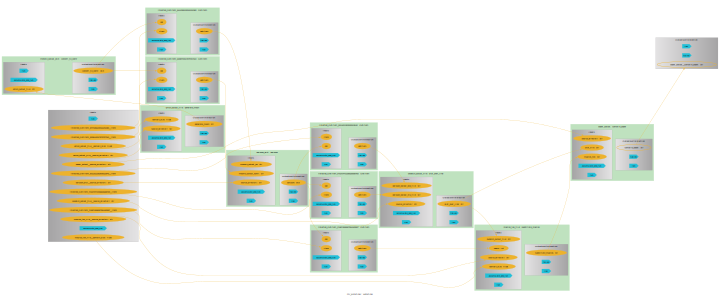

In [14]:
wf.draw(size=(10,10))

In [15]:
pf = PyironFlow([wf])
pf.gui

In [16]:
workflow_json_filename = "pyiron_workflow_nfdi.json"

In [17]:
write_workflow_json(graph_as_dict=wf.graph_as_dict, file_name=workflow_json_filename)

## Load Workflow with pyiron_base

In [18]:
from python_workflow_definition.pyiron_base import load_workflow_json

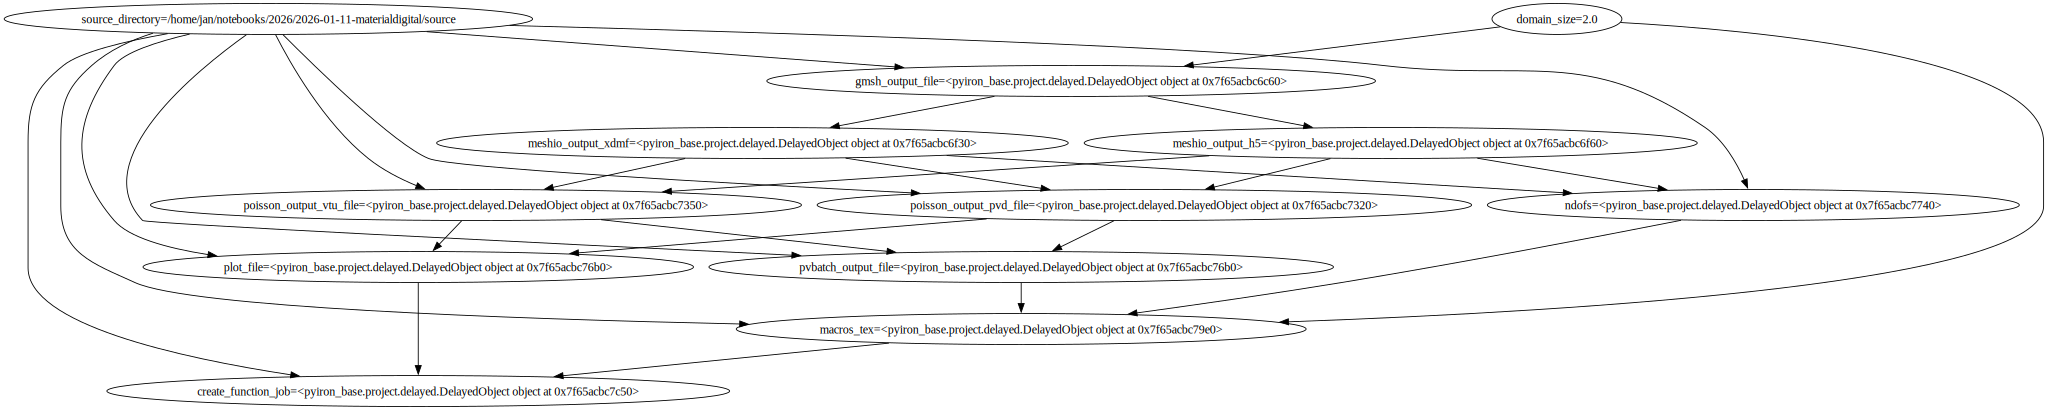

In [19]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [20]:
delayed_object_lst[-1].pull()

The job generate_mesh_aac69fbaceeeff047d2136e52922192a was saved and received the ID: 25
The job convert_to_xdmf_52420279e23310f0477910acac93ce14 was saved and received the ID: 26
The job poisson_1154f2a730887c7774da02cc77d9b194 was saved and received the ID: 27


/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


The job plot_over_line_6b1affcb3a618483159fd6d75c985b82 was saved and received the ID: 28
The job substitute_macros_783188211c0cbfb785e10a750a4f8243 was saved and received the ID: 29
The job compile_paper_78b27eddb2cdc36c79a4a0e28935921f was saved and received the ID: 30


'/home/jan/notebooks/2026/2026-01-11-materialdigital/postprocessing/paper.pdf'

## Load Workflow with executorlib

In [21]:
from executorlib import SingleNodeExecutor

In [22]:
from python_workflow_definition.executorlib import load_workflow_json

In [23]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name=workflow_json_filename, exe=exe).result()

/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [24]:
result

'/home/jan/notebooks/2026/2026-01-11-materialdigital/postprocessing/paper.pdf'